# Info
: 기사에 사용된 단어들을 이용해 단어들의 경향성을 찾아내기 위한 코드3.1(25개 구)

In [1]:
import pandas as pd
import glob

file_name = glob.glob('../article/headline_noun_keyword*')

keyword_df = []
for file in file_name:
    df = pd.read_pickle(file)
    keyword_df.append(df)

keyword_all = pd.concat(keyword_df, ignore_index = True)
keyword = keyword_all[keyword_all['week'] <= 807]
keyword

,date,co,headline,week,pos
0,2006.01.01. 오후 11:23,매일경제,취득세ㆍ등록세 0.5%P씩 인하,0,"[취득세, 인하]"
1,2006.01.01. 오후 11:23,매일경제,양도세 부담 덜자 하반기 매물 늘듯,0,"[양도세, 부담, 하반기, 매물]"
2,2006.01.01. 오후 11:23,매일경제,서울 대치동 57평형 보유세 651만원,0,"[서울, 대치동, 평, 보유, 세, 만, 원]"
3,2006.01.01. 오후 11:23,매일경제,양도세 줄이는 방법 필요경비 증빙서류 꼭 챙기자,0,"[양도세, 방법, 필요, 경비, 증빙, 서류]"
4,2006.01.01. 오후 11:23,매일경제,올해 실거래가 신고제 폭풍 이중계약서 관행 사라진다,0,"[올해, 실, 거래, 신고, 폭풍, 이중, 계약서, 관행]"
...,...,...,...,...,...
1065646,2021.06.26. 오전 5:00,뉴시스,비상 걸린 전세⑥전문가들 꼬일 대로 꼬였다…규제라도 풀어야,807,"[비상, 전세, 전문가, 대로, 규제]"
1065647,2021.06.26. 오전 3:04,세계일보,‘래미안 원베일리’ 청약에 만점 통장 등장… 올해 두 번째,807,"[래미안, 원, 베일리, 청약, 만점, 통장, 등장, 올해, 번]"
1065648,2021.06.26. 오전 3:01,동아일보,‘10억 로또 청약’ 원베일리… 7인 가족 만점통장 나왔다,807,"[억, 로또, 청약, 원, 베일리, 인, 가족, 만점, 통장]"
1065649,2021.06.26. 오전 3:01,동아일보,故 이건희 회장 이태원 주택 210억에 매물로,807,"[이건희, 회장, 이태원, 주택, 억, 매물]"


In [3]:
up_keyword = ['상승', '상승세', '오름세', '급등', '폭']
down_keyword = ['하락', '하락세', '약세', '보합', '급락']

In [4]:
weekly_keyword = keyword.groupby(['week']).sum()['pos']
count = keyword.groupby(['week']).count()['pos']

In [5]:
import pos_to_dict

word_df =  pos_to_dict.pos_to_dict(keyword)
word_df

,0,1,2,3,4,5,6,7,8,9,...,798,799,800,801,802,803,804,805,806,807
취득세,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,0.0,0.0,3.0,2.0,2.0,0.0,11.0,1.0
인하,1.0,3.0,1.0,1.0,4.0,2.0,1.0,4.0,3.0,3.0,...,3.0,7.0,1.0,2.0,4.0,6.0,4.0,0.0,1.0,0.0
양도세,11.0,4.0,5.0,10.0,3.0,2.0,2.0,0.0,6.0,2.0,...,8.0,5.0,7.0,18.0,16.0,20.0,89.0,9.0,18.0,8.0
부담,2.0,1.0,3.0,1.0,7.0,1.0,0.0,2.0,3.0,1.0,...,10.0,16.0,24.0,8.0,4.0,12.0,10.0,5.0,8.0,5.0
하반기,2.0,0.0,1.0,1.0,1.0,1.0,9.0,6.0,0.0,0.0,...,1.0,10.0,6.0,5.0,2.0,9.0,9.0,7.0,30.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
수파,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
열독,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
팔곡,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
서선,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
up_word_df = word_df.loc[up_keyword,:]
up_word_df = up_word_df.transpose()

total_list = []

for i in range(len(up_word_df)):
    total = 0
    for j in up_word_df.iloc[i]:
        total += j
    total_list.append(total)
up_word_df['total'] = total_list
up_word_df = up_word_df.transpose()

In [7]:
down_word_df = word_df.loc[down_keyword,:]
down_word_df = down_word_df.transpose()

total_list = []

for i in range(len(down_word_df)):
    total = 0
    for j in down_word_df.iloc[i]:
        total += j
    total_list.append(total)
down_word_df['total'] = total_list
down_word_df = down_word_df.transpose()

In [173]:
gu_name = ['강남구','강동구','강서구','강북구','관악구','광진구','구로구','금천구',
          '노원구','동대문구','도봉구','동작구','마포구','서대문구','성동구','성북구',
          '서초구','송파구','영등포구','용산구','양천구','은평구','종로구','중구','중랑구']
gu_dict = {}
i = 0
for gu in gu_name:
    gu_dict[gu] = i
    i += 1
    
many = len(gu_name)

In [9]:
gu_data = []

for gu in gu_name:
    df = pd.read_pickle(f'../seoul_apt_trade_data/{gu}_trade.pkl')
    df = df[df['거래주'] <= 807]
    df = df.groupby(['거래주']).mean(['면적당가격'])
    for i in range(1,808):
        try:
            if df['면적당가격'][i]:
                continue
        except:
            df.loc[i] = df.loc[i-1]
    gu_data.append(df)

In [10]:
case_index_df = pd.read_pickle('../seoul_apt_trade_data/case_index_df.pkl')
case_index_df
varivation = list(case_index_df.loc[:,'uprate'])
_avg = list(case_index_df.loc[:,'uprate_avg'])

In [11]:
for row in range(len(case_index_df)):
    for i in range(len(varivation)):
        varivation[row][i] = varivation[row][i]-_avg[row]

In [12]:
import matplotlib.pyplot as plt
import scipy.stats

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

price_upword_spearman = {'correl':[],'p-val':[]}
price_upword_pearson = {'correl':[],'p-val':[]}
for i in range(many):
    spearman = scipy.stats.spearmanr(up_word_df.loc['total'],gu_data[i]['면적당가격'])
    price_upword_spearman['correl'].append(spearman[0])
    price_upword_spearman['p-val'].append(spearman[1])
    pearson = scipy.stats.pearsonr(up_word_df.loc['total'],gu_data[i]['면적당가격'])
    price_upword_pearson['correl'].append(pearson[0])
    price_upword_pearson['p-val'].append(pearson[1])
price_upword_spearman_df = pd.DataFrame(price_upword_spearman, index = gu_name)
price_upword_pearson_df = pd.DataFrame(price_upword_pearson, index = gu_name)

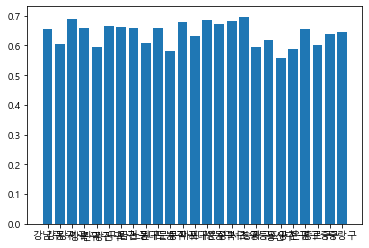

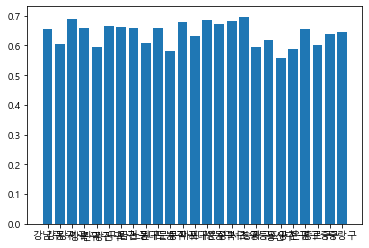

In [13]:
plt.bar(gu_name,price_upword_spearman_df['correl'])
plt.show()
plt.bar(gu_name,price_upword_spearman_df['correl'])
plt.show()

In [14]:
def shift_gap_with_range_price(start, end, word_df, name, gap):
    data = {}
    data['선행주차'] = []
    data['spearman'] = []
    data['pearson'] = []
    gu = gu_dict[name]
    x = [word_df.loc['total'][start+i]/count[start+i] for i in range(end-start)]
    for g in range(-gap,gap+1):
        y = [i for i in gu_data[gu]['면적당가격'][start+g:end+g]]
        data['선행주차'].append(g)
        data['spearman'].append(scipy.stats.spearmanr(x,y))
        data['pearson'].append(scipy.stats.pearsonr(x,y))
    data_df = pd.DataFrame(data)
    return data_df

C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


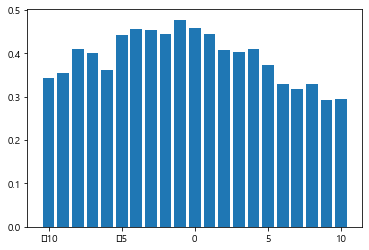

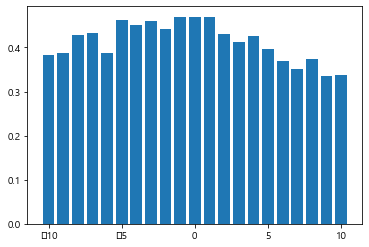

,선행주차,spearman,pearson
0,-10,"(0.3428115813647533, 7.658375211421415e-07)","(0.3825703572817638, 2.6637667065096328e-08)"
1,-9,"(0.35386824910585846, 3.1491856891174183e-07)","(0.38689418005187615, 1.7976501715448582e-08)"
2,-8,"(0.41104847418139767, 1.795048022043304e-09)","(0.4290790594024927, 2.840833350818152e-10)"
3,-7,"(0.4013507005880038, 4.6287688804388564e-09)","(0.43174390351769054, 2.1431715097925248e-10)"
4,-6,"(0.3617897207928583, 1.6312528694381446e-07)","(0.3864875086472147, 1.8658388816005533e-08)"
5,-5,"(0.44225356902958113, 6.88451291740256e-11)","(0.4627307959244723, 6.716470434241976e-12)"
6,-4,"(0.4566247635655589, 1.366445837880027e-11)","(0.45048539833945306, 2.7518421798418223e-11)"
7,-3,"(0.45324221476556753, 2.0130346596758743e-11)","(0.460352433136917, 8.871833968245279e-12)"
8,-2,"(0.4457489725198829, 4.678100877986654e-11)","(0.4409007746837691, 7.985575157700265e-11)"
9,-1,"(0.47753998418488375, 1.1302104379660066e-12)","(0.4695855951030159, 2.9751210469480482e-12)"


In [15]:
df = shift_gap_with_range_price(600,798,up_word_df,'강서구',10)
plt.bar(df['선행주차'],[i[0] for i in df['spearman']])
plt.show()
plt.bar(df['선행주차'],[i[0] for i in df['pearson']])
plt.show()
display(df)

C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


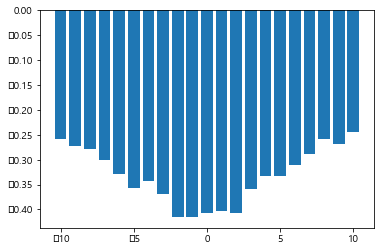

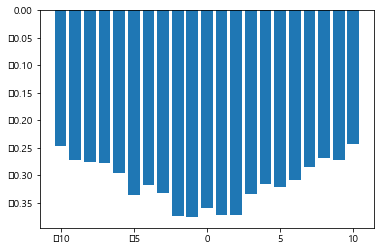

,선행주차,spearman,pearson
0,-10,"(-0.2576835879134173, 0.00024727966261092694)","(-0.24658850955183018, 0.0004616504647654042)"
1,-9,"(-0.2719481115777318, 0.00010631003997209034)","(-0.2719117703918731, 0.00010654535001156062)"
2,-8,"(-0.2781442978621766, 7.258929165130762e-05)","(-0.2756464088135982, 8.47516617832008e-05)"
3,-7,"(-0.29965625698095155, 1.796332256180347e-05)","(-0.2777683889194836, 7.430844249435545e-05)"
4,-6,"(-0.3282069476748456, 2.3531215445079917e-06)","(-0.2957088416239956, 2.3408014919233092e-05)"
5,-5,"(-0.3564639069829999, 2.5435618352258744e-07)","(-0.3357873440414354, 1.3235140131813906e-06)"
6,-4,"(-0.34315787520899377, 7.451986992990214e-07)","(-0.3168153275051353, 5.429907958978342e-06)"
7,-3,"(-0.3698209552608451, 8.220435193676279e-08)","(-0.33207278352527536, 1.7580346160081384e-06)"
8,-2,"(-0.4156662407561574, 1.1311433895134425e-09)","(-0.37364449029086055, 5.8928623183828325e-08)"
9,-1,"(-0.4159692478698677, 1.0971114796257433e-09)","(-0.37629882807531345, 4.6651107933162384e-08)"


In [16]:
df = shift_gap_with_range_price(600,798,down_word_df,'강서구',10)
plt.bar(df['선행주차'],[i[0] for i in df['spearman']])
plt.show()
plt.bar(df['선행주차'],[i[0] for i in df['pearson']])
plt.show()
display(df)

In [17]:
def shift_gap_with_range_price_seoul(start, end, word_df, gap):
    x = [word_df.loc['total'][start+i]/count[start+i] for i in range(end-start)]
    for name in gu_name:
        data = {}
        data['선행주차'] = []
        data['spearman'] = []
        data['pearson'] = []
        gu = gu_dict[name]
        for g in range(-gap,gap+1):
            y = [i for i in gu_data[gu]['면적당가격'][start+g:end+g]]
            data['선행주차'].append(g)
            data['spearman'].append(scipy.stats.spearmanr(x,y))
            data['pearson'].append(scipy.stats.pearsonr(x,y))
        plt.plot(data['선행주차'],[i[0] for i in data['spearman']], linewidth = 1, alpha = 0.5)
    plt.show()

C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


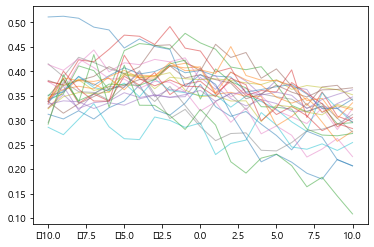

In [18]:
shift_gap_with_range_price_seoul(600,798,up_word_df,10)

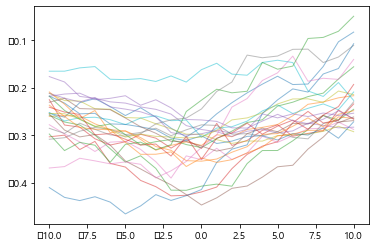

In [19]:
shift_gap_with_range_price_seoul(600,798,down_word_df,10)

In [66]:
from datetime import date
start_date = date(2006,1,1)
mh = date(2008,2,24)
mb = date(2013,2,24)
gh = date(2016,12,9)
ga = date(2017,5,10) #황교안 대행
ji = date(2022,5,9)
mhw = (mh - start_date).days//7
mbw = (mb - start_date).days//7
ghw = (gh - start_date).days//7
gaw = (ga - start_date).days//7
jiw = (ji - start_date).days//7

In [84]:
time_range = []
time_range.append((0,mhw))
print(mhw)
time_range.append((mhw,mbw))
print(mbw-mhw)
time_range.append((mbw,ghw))
print(ghw-mbw)
time_range.append((ghw,gaw))
print(gaw-ghw)
time_range.append((gaw,808))
print(808-gaw)

112
261
197
22
216


In [85]:
112+261+197+22+216

808

In [133]:
gov = ['mh','mb','gh','ga','ji']

In [188]:
gap = 10

df_list = []

g = 0
for x,y in time_range:
    x += gap
    y -= gap
    gov_df_list = {}
    for gu in gu_name:
        gov_df_list[gu] = shift_gap_with_range_price(x,y,down_word_df,gu,gap)
    df_list.append(gov_df_list)
    g += 1

spearman


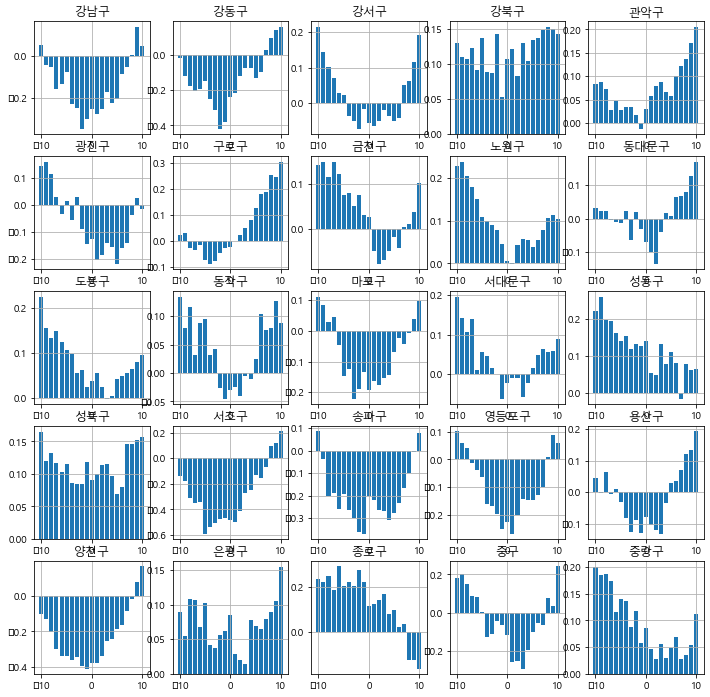

In [195]:
plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams['axes.grid'] = True

print('spearman')
gov_df_list = df_list[0]

g = 1
for gu in gu_name:
    df = gov_df_list[gu]
    plt.subplot(5,5,g)
    plt.title(gu)
    plt.bar(df['선행주차'],[i[0] for i in df['spearman']])
    #plt.bar(df['선행주차'],[i[0] for i in df['pearson']])
    g += 1
plt.show()

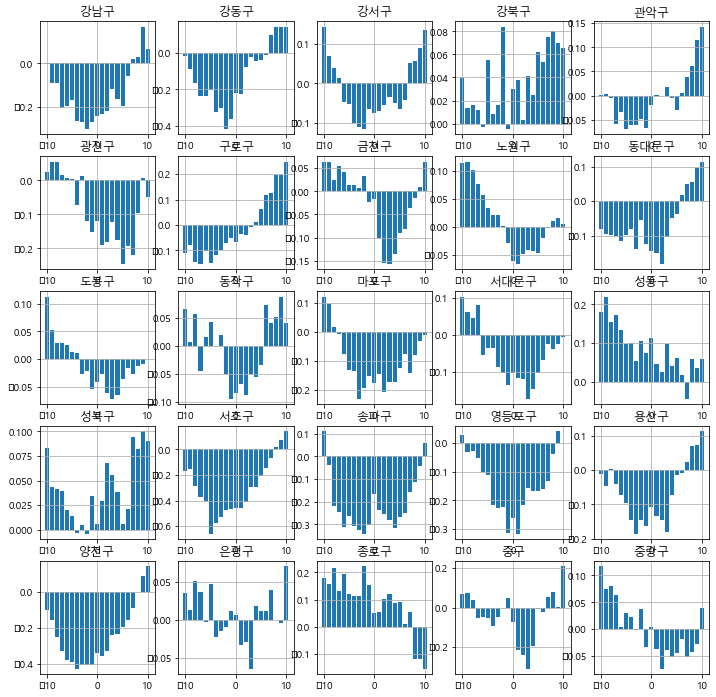

In [196]:

gov_df_list = df_list[0]
g = 1
for gu in gu_name:
    df = gov_df_list[gu]
    plt.subplot(5,5,g)
    plt.title(gu)
    plt.bar(df['선행주차'],[i[0] for i in df['pearson']])
    g += 1
plt.show()

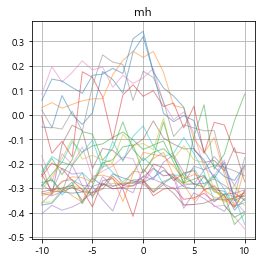

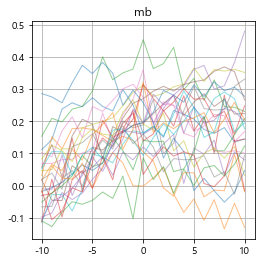

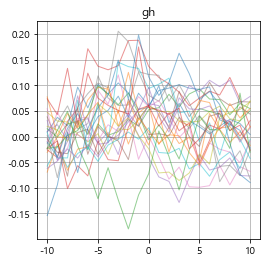

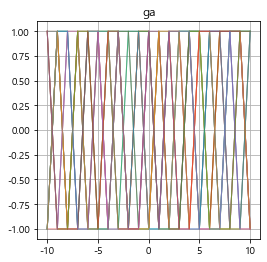

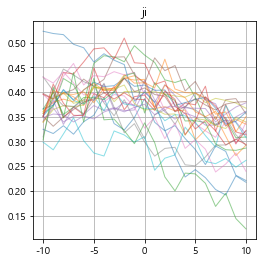

In [199]:
gap = 10
plt.rcParams["figure.figsize"] = (4,4)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.unicode_minus'] = False

g = 0
for x,y in time_range:
    x += gap
    y -= gap
    plt.title(gov[g])
    shift_gap_with_range_price_seoul(x,y,up_word_df,gap)
    g += 1

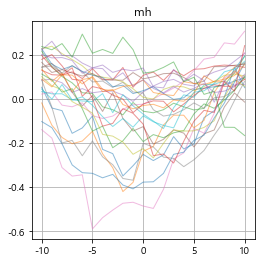

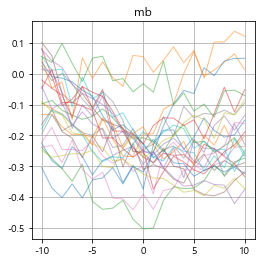

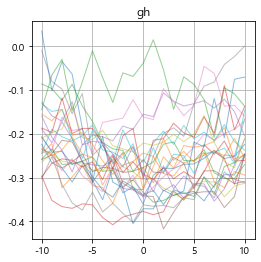

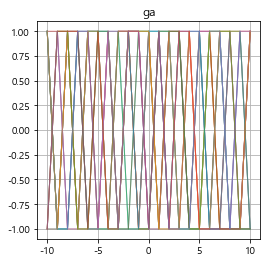

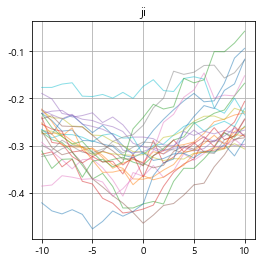

In [200]:
gap = 10
plt.rcParams["figure.figsize"] = (4,4)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.unicode_minus'] = False

g = 0
for x,y in time_range:
    x += gap
    y -= gap
    plt.title(gov[g])
    shift_gap_with_range_price_seoul(x,y,down_word_df,gap)
    g += 1

In [21]:
case_index_df = pd.read_pickle('../seoul_apt_trade_data/case_index_df.pkl')
case_index_df
varivation = list(case_index_df.loc[:,'uprate'])
_avg = list(case_index_df.loc[:,'uprate_avg'])

In [22]:
def shift_gap_with_range_variation(start, end, word_df, name, gap):
    data = {}
    data['선행주차'] = []
    data['spearman'] = []
    data['pearson'] = []
    x = [word_df.loc['total'][start+i]/count[start+i] for i in range(end-start)]
    for g in range(-gap,gap+1):
        y = [i for i in case_index_df.loc[name,'uprate'][start+g:end+g]]
        data['선행주차'].append(g)
        data['spearman'].append(scipy.stats.spearmanr(x,y))
        data['pearson'].append(scipy.stats.pearsonr(x,y))
    data_df = pd.DataFrame(data)
    return data_df

C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


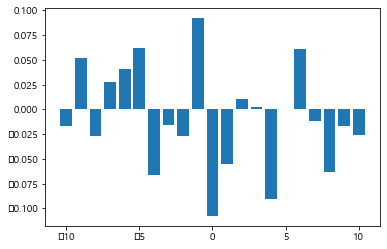

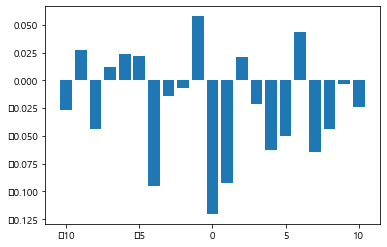

In [23]:
df = shift_gap_with_range_variation(600,797,up_word_df,'강남구',10)
plt.bar(df['선행주차'],[i[0] for i in df['spearman']])
plt.show()
plt.bar(df['선행주차'],[i[0] for i in df['pearson']])
plt.show()

In [24]:
def shift_gap_with_range_variation_logi(start, end, word_df, name, gap):
    data = {}
    data['선행주차'] = []
    data['spearman'] = []
    data['pearson'] = []
    x = [word_df.loc['total'][start+i]/count[start+i] for i in range(end-start)]
    for g in range(-gap,gap+1):
        y = [i for i in case_index_df.loc[name,'uprate'][start+g:end+g]]
        for v in range(len(y)):
            if y[v] >= case_index_df.loc[name,'uprate_avg']:
                y[v] = 1
            else:
                y[v] = 0
        data['선행주차'].append(g)
        data['spearman'].append(scipy.stats.spearmanr(x,y))
        data['pearson'].append(scipy.stats.pearsonr(x,y))
    data_df = pd.DataFrame(data)
    return data_df

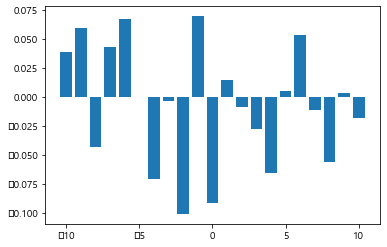

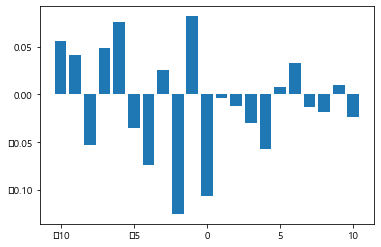

In [25]:
df = shift_gap_with_range_variation_logi(600,797,up_word_df,'강남구',10)
plt.bar(df['선행주차'],[i[0] for i in df['spearman']])
plt.show()
plt.bar(df['선행주차'],[i[0] for i in df['pearson']])
plt.show()

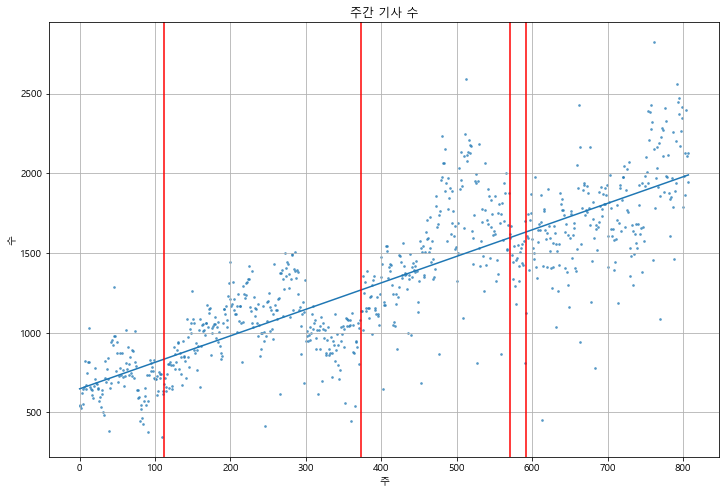

In [204]:
from sklearn.linear_model import LinearRegression
import numpy as np

plt.rcParams["figure.figsize"] = (12,8)

x = pd.Series([i for i in range(len(count))])
y = pd.Series(count)

line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1), y)

plt.scatter(x, y, s = 3, alpha = 0.6)
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
plt.axvline(x = mhw, c = 'r')
plt.axvline(x = mbw, c = 'r')
plt.axvline(x = ghw, c = 'r')
plt.axvline(x = gaw, c = 'r')
plt.title("주간 기사 수")
plt.xlabel("주")
plt.ylabel("수")
plt.show()

In [42]:
slope = line_fitter.coef_[0]
intercept = line_fitter.intercept_

print(f"function: {intercept} + {slope}*i")

function: 648.3136251820483 + 1.6618621432910823*i


In [43]:
def flat_func(i):
    return slope*i + intercept

In [44]:
flatten_weekly = pd.DataFrame({'data' : [count[i] - flat_func(i) for i in range(len(count))]})

C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dudrb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


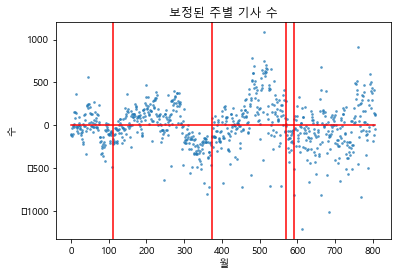

In [45]:
x1 = pd.Series([i for i in range(len(count))])
y1 = flatten_weekly['data']
plt.scatter(x1, y1, s = 3, alpha = 0.6)
plt.axvline(x = mhw, c = 'r')
plt.axvline(x = mbw, c = 'r')
plt.axvline(x = ghw, c = 'r')
plt.axvline(x = gaw, c = 'r')

x2 = [i for i in range(len(count))]
y2 = [0 for i in range(len(count))]
plt.plot(x2, y2, color = 'r')
plt.title("보정된 주별 기사 수")
plt.xlabel("월")
plt.ylabel("수")
plt.show()

In [46]:
linear_data = pd.DataFrame({'data' : [(1+(count[i]-flat_func(i))/flat_func(i))*100 for i in range(len(count))]})

[]

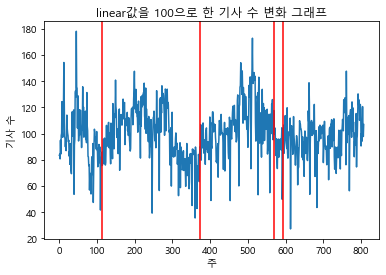

In [47]:
plt.plot(linear_data)
plt.axvline(x = mhw, c = 'r')
plt.axvline(x = mbw, c = 'r')
plt.axvline(x = ghw, c = 'r')
plt.axvline(x = gaw, c = 'r')
plt.title("linear값을 100으로 한 기사 수 변화 그래프")
plt.xlabel("주")
plt.ylabel("기사 수")
plt.plot()

In [53]:
jiw -= gaw
gaw -= ghw
ghw -= mbw
mbw -= mhw

SpearmanrResult(correlation=0.10284175126699743, pvalue=0.0034274542867564735)
(0.016344151768414313, 0.6427195170057974)
SpearmanrResult(correlation=0.032277115801424415, pvalue=0.35950622456709713)
(0.009148658912826135, 0.795128685201815)
SpearmanrResult(correlation=0.12726667458608779, pvalue=0.0002870053203745233)
(0.033504031219692136, 0.34152510970450395)
SpearmanrResult(correlation=0.07881425199635442, pvalue=0.02506889621857389)
(0.034921354346948034, 0.3214819827041454)
SpearmanrResult(correlation=-0.00877101670216833, pvalue=0.8034087805198669)
(-0.02665136261715315, 0.44932812245085296)
SpearmanrResult(correlation=0.1050124339612864, pvalue=0.0028020375970223294)
(0.03778546907761899, 0.28336752237300566)
SpearmanrResult(correlation=0.06900917896091585, pvalue=0.04988944229520161)
(0.00912752196783425, 0.795591530328227)
SpearmanrResult(correlation=0.11858195468657172, pvalue=0.0007316456556170243)
(0.0702728617297313, 0.045835315074901746)
SpearmanrResult(correlation=0.115

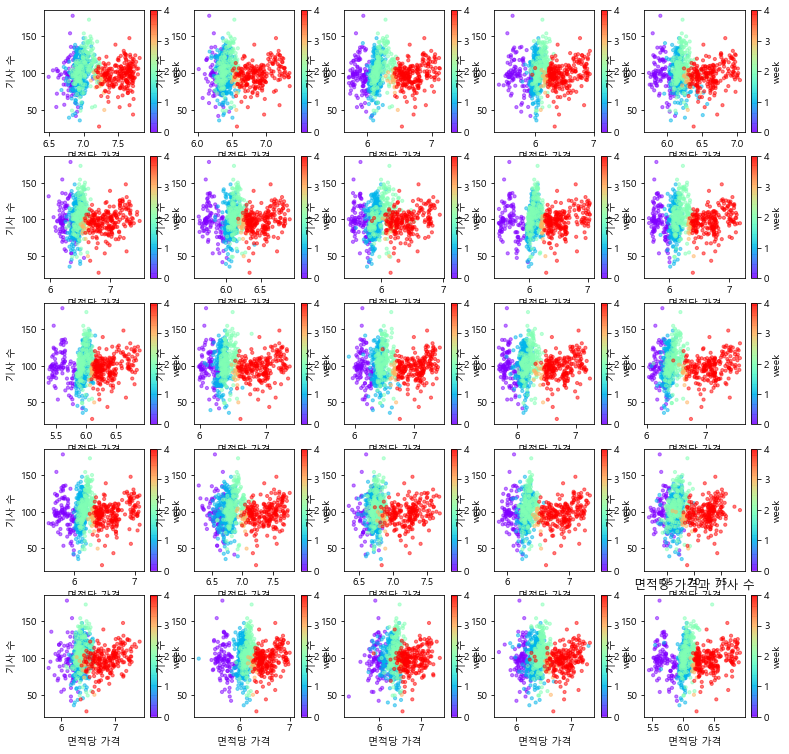

In [55]:
import math

plt.figure(figsize = (13,13))
for gu in range(many):
    color = mhw*[0]+mbw*[1]+ghw*[2]+gaw*[3]+jiw*[4]
    plt.subplot(5,5,gu+1)
    plt.scatter([math.log(i) for i in gu_data[gu]['면적당가격']],linear_data['data'], s=10, c=color[:808], cmap = plt.cm.rainbow, alpha = 0.5)
    plt.colorbar(label='week')
    plt.xlabel("면적당 가격")
    plt.ylabel("기사 수")
    print(scipy.stats.spearmanr([math.log(i) for i in gu_data[gu]['면적당가격']],linear_data['data']))
    print(scipy.stats.pearsonr([math.log(i) for i in gu_data[gu]['면적당가격']],linear_data['data']))
plt.title("면적당 가격과 기사 수")
plt.savefig("면적당 가격과 기사 수.png")
plt.show()